# Bay Wheels Operation

In [1]:
import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/MCanela-1954/Data/main/'

In [3]:
rides1 = pd.read_csv(path + 'bay_rides-1.csv.zip')
rides2 = pd.read_csv(path + 'bay_rides-2.csv.zip')
rides3 = pd.read_csv(path + 'bay_rides-3.csv.zip')
rides4 = pd.read_csv(path + 'bay_rides-4.csv.zip')
rides5 = pd.read_csv(path + 'bay_rides-5.csv.zip')

In [4]:
rides = pd.concat([rides1, rides2, rides3, rides4, rides5])

In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7162392 entries, 0 to 1162391
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_type         object
 1   bike_type         object
 2   start_time        object
 3   start_station_id  object
 4   end_time          object
 5   end_station_id    object
dtypes: object(6)
memory usage: 382.5+ MB


In [6]:
rides.head()

,user_type,bike_type,start_time,start_station_id,end_time,end_station_id
0,casual,electric,2021-01-01 00:01:01,NaN,2021-01-01 00:31:31,NaN
1,member,classic,2021-01-01 00:01:11,SF-I24,2021-01-01 00:21:46,SF-L29
2,member,electric,2021-01-01 00:01:44,NaN,2021-01-01 01:01:05,NaN
3,casual,electric,2021-01-01 00:03:44,SF-G30-1,2021-01-01 00:44:51,NaN
4,casual,electric,2021-01-01 00:05:33,NaN,2021-01-01 00:22:02,NaN


We group by month to see the monthly variation in demand

In [7]:
rides['month'] = rides['start_time'].str[:-11] + '01 00:00:00'
rides.head()

,user_type,bike_type,start_time,start_station_id,end_time,end_station_id,month
0,casual,electric,2021-01-01 00:01:01,NaN,2021-01-01 00:31:31,NaN,2021-01-01 00:00:00
1,member,classic,2021-01-01 00:01:11,SF-I24,2021-01-01 00:21:46,SF-L29,2021-01-01 00:00:00
2,member,electric,2021-01-01 00:01:44,NaN,2021-01-01 01:01:05,NaN,2021-01-01 00:00:00
3,casual,electric,2021-01-01 00:03:44,SF-G30-1,2021-01-01 00:44:51,NaN,2021-01-01 00:00:00
4,casual,electric,2021-01-01 00:05:33,NaN,2021-01-01 00:22:02,NaN,2021-01-01 00:00:00


In [8]:
rides['month'] = rides['month'].astype('datetime64[ns]')
rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7162392 entries, 0 to 1162391
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_type         object        
 1   bike_type         object        
 2   start_time        object        
 3   start_station_id  object        
 4   end_time          object        
 5   end_station_id    object        
 6   month             datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 437.2+ MB


In [9]:
rides['electric'] = (rides['bike_type'] == 'electric')
rides['classic'] = (rides['bike_type'] == 'classic')

We sum the data to group it by month

### Question 1 - Analysis of the Variation in Demand Between Classic and Electric Bikes

In [10]:
df1 = rides[['month', 'electric', 'classic']].groupby(by='month').sum()
df1.head()

,electric,classic
month,,
2021-01-01,70182,31110
2021-02-01,78352,31484
2021-03-01,93265,37311
2021-04-01,103932,40732
2021-05-01,120487,47393


Indexed using month

In [11]:
df1.index

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='month', freq=None)

In [12]:
df1.index.name = None

In [13]:
df1['total'] = df1['classic'] + df1['electric']

The result of grouping by month

In [14]:
df1['month'] = df1.index
df1.head()

,electric,classic,total,month
2021-01-01,70182,31110,101292,2021-01-01
2021-02-01,78352,31484,109836,2021-02-01
2021-03-01,93265,37311,130576,2021-03-01
2021-04-01,103932,40732,144664,2021-04-01
2021-05-01,120487,47393,167880,2021-05-01


<Axes: title={'center': 'Figure 1. Trend of total demand based on bike type'}, xlabel='month'>

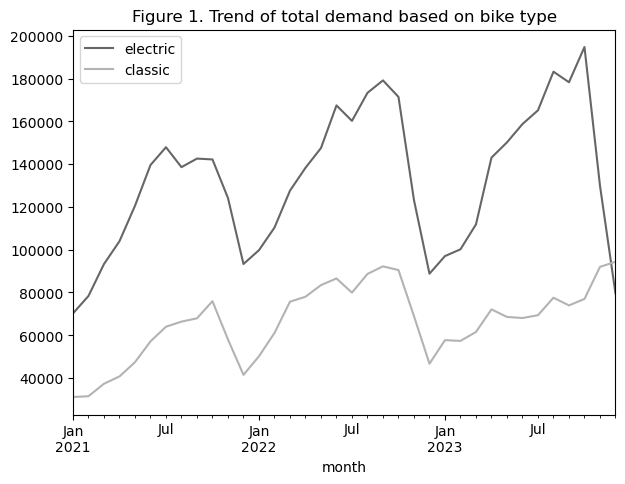

In [15]:
df1[['electric', 'classic', 'month']].groupby('month').sum().plot(figsize=(7,5),
    title='Figure 1. Trend of total demand based on bike type', color=['0.4', '0.7'])

In [16]:
df1.tail(8)

,electric,classic,total,month
2023-05-01,150153,68543,218696,2023-05-01
2023-06-01,158709,68038,226747,2023-06-01
2023-07-01,165132,69351,234483,2023-07-01
2023-08-01,183192,77534,260726,2023-08-01
2023-09-01,178254,73931,252185,2023-09-01
2023-10-01,194719,76959,271678,2023-10-01
2023-11-01,129942,91940,221882,2023-11-01
2023-12-01,79564,94338,173902,2023-12-01


As we can see, the trend of both electric and classic bikes are the same, with both reaching their own respective peaks and lows depending on the seasonality. However, in the end 2023, there is a significant dip for the electric bike demand compared to the classic bike demand, which continued to record increase in demand unlike electric, which started to record decrease since November 2023.

Data in the first quarter of 2024 can greatly help see whether it is just an anomaly if the trend goes back to the trend that was seen in previous years.

Let us go further than the initial question by looking at other statistics. Looking only at the trend does not show us the change in share between the two products in percentage. Let us see how the percentage has changed over the year.

In [37]:
# Extract the year
df1['year'] = df1['month'].dt.year

# Group by year and bike type and sum
yearly_bike_type = df1.groupby('year')[['electric', 'classic']].sum()

# Calculate the total rides per year
yearly_bike_type['total'] = yearly_bike_type['electric'] + yearly_bike_type['classic']

# Calculate the percentage share
yearly_bike_type['electric_percentage'] = (yearly_bike_type['electric'] / yearly_bike_type['total']) * 100
yearly_bike_type['classic_percentage'] = (yearly_bike_type['classic'] / yearly_bike_type['total']) * 100

# Display the result
print(yearly_bike_type[['electric_percentage', 'classic_percentage']])

      electric_percentage  classic_percentage
year                                         
2021            69.264398           30.735602
2022            65.166081           34.833919
2023            66.056131           33.943869


In terms of share, we can conclude that classic has increased in share between the two. However, this can lead us into believing that the total demand for electric is sinking, and it is being taken over by classic. Therefore, we should calculate the CAGR (compounded annual growth rate) to see the growth of each product individually.

In [39]:
# Assuming 'yearly_bike_type' DataFrame is already created and contains 'electric' and 'classic' rides per year

# Get the first and last year in your data
first_year = yearly_bike_type.index.min()
last_year = yearly_bike_type.index.max()

# Get the ride counts for the first and last full year for electric and classic
beginning_electric = yearly_bike_type.loc[first_year, 'electric']
ending_electric = yearly_bike_type.loc[last_year, 'electric']

beginning_classic = yearly_bike_type.loc[first_year, 'classic']
ending_classic = yearly_bike_type.loc[last_year, 'classic']

# Determine the number of years
number_of_years = last_year - first_year

# Calculate CAGR for electric bikes
cagr_electric = (ending_electric / beginning_electric)**(1 / number_of_years) - 1

# Calculate CAGR for classic bikes
cagr_classic = (ending_classic / beginning_classic)**(1 / number_of_years) - 1

print(f"The Compound Annual Growth Rate (CAGR) for electric rides from {first_year} to {last_year} is: {cagr_electric:.2%}")
print(f"The Compound Annual Growth Rate (CAGR) for classic rides from {first_year} to {last_year} is: {cagr_classic:.2%}")

The Compound Annual Growth Rate (CAGR) for electric rides from 2021 to 2023 is: 10.14%
The Compound Annual Growth Rate (CAGR) for classic rides from 2021 to 2023 is: 18.53%


By calculating the CAGR, we now know that both products are growing in demand. However, since classic had lower starting point, it is generally easier for products with lower amount of demand in the beginning to get a higher growth.

### Question 2 - Dockless Sharing Trend Analysis

In [17]:
rides['dockless'] = rides['start_station_id'].isnull() | rides['end_station_id'].isnull()
rides['reg_electric'] = (rides['electric'] & ((rides['start_station_id'].isnull() | rides['end_station_id'].isnull()) == False))
rides.head()

,user_type,bike_type,start_time,start_station_id,end_time,end_station_id,month,electric,classic,dockless,reg_electric
0,casual,electric,2021-01-01 00:01:01,NaN,2021-01-01 00:31:31,NaN,2021-01-01,True,False,True,False
1,member,classic,2021-01-01 00:01:11,SF-I24,2021-01-01 00:21:46,SF-L29,2021-01-01,False,True,False,False
2,member,electric,2021-01-01 00:01:44,NaN,2021-01-01 01:01:05,NaN,2021-01-01,True,False,True,False
3,casual,electric,2021-01-01 00:03:44,SF-G30-1,2021-01-01 00:44:51,NaN,2021-01-01,True,False,True,False
4,casual,electric,2021-01-01 00:05:33,NaN,2021-01-01 00:22:02,NaN,2021-01-01,True,False,True,False


In [18]:
df2 = rides[['month', 'classic', 'electric', 'dockless', 'reg_electric']].groupby(by='month').sum()
df2.head()

,classic,electric,dockless,reg_electric
month,,,,
2021-01-01,31110,70182,37887,32295
2021-02-01,31484,78352,41318,37034
2021-03-01,37311,93265,48919,44346
2021-04-01,40732,103932,52139,51793
2021-05-01,47393,120487,60061,60426


We evaluate the truthfulness that only electrics can be dockless, and we get the difference between all electric and dockless electric

In [19]:
electric = rides['electric'].sum()
dockless_electric = (rides['dockless'] & rides['electric']).sum()
docking_electric = (rides['electric'] & (rides['dockless'] == False)).sum()
classic = rides['classic'].sum()
dockless_classic = (rides['dockless'] & rides['classic']).sum()

print("Electric Total          : %10d" % electric)
print("Dockless Electric Total : %10d" % dockless_electric)
print("Docking Electric Total  : %10d" % docking_electric)
print("Classic Total           : %10d" % classic)
print("Dockless Classic Total  : %10d" % dockless_classic)

Electric Total          :    4772748
Dockless Electric Total :    1932869
Docking Electric Total  :    2839879
Classic Total           :    2389644
Dockless Classic Total  :          0


We have proved that only electrics can be dockless

In [20]:
df2.index.name = None

In [21]:
df2['month'] = df2.index
df2.head()

,classic,electric,dockless,reg_electric,month
2021-01-01,31110,70182,37887,32295,2021-01-01
2021-02-01,31484,78352,41318,37034,2021-02-01
2021-03-01,37311,93265,48919,44346,2021-03-01
2021-04-01,40732,103932,52139,51793,2021-04-01
2021-05-01,47393,120487,60061,60426,2021-05-01


<Axes: title={'center': 'Figure 2. Trend of total demand compared to dockless'}, xlabel='month'>

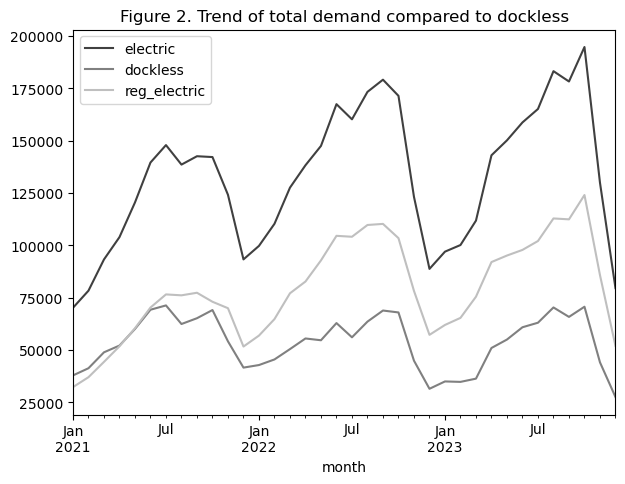

In [22]:
df2[['electric', 'dockless', 'reg_electric', 'month']].groupby('month').sum().plot(figsize=(7,5),
    title='Figure 2. Trend of total demand compared to dockless', color=['0.25', '0.5', '0.75'])

As seen on the trend above, the trend of dockless electric bikes closely follow the change in trend of all electric bikes. However, dockless electric rides are initially more popular than docking electric rides, from January to April 2021. After that point, dockless electric rides have been less popular than docking electric rides.

The trend started to take shape starting in January 2022, and since January 2023, the trend for all electric rides, which consists of docking and dockless are almost the exact same. Both also follow the trend for electric ride as a whole. This means that probably, after the initial launch of dockless rides, each segment has its own users.

### Question 3 - Comparison of Starting and Ending Stations

We first have to create a new dataframe which consists of the station IDs and the counts of both start and end

In [23]:
station_counts = (
    pd.concat(
        [rides['start_station_id'].value_counts(dropna=False),
         rides['end_station_id'].value_counts(dropna=False)],
         axis=1,
         keys=['start_count', 'end_count']
    )
    .fillna(0)
    .astype(int)
    .rename_axis('station_id')
    .reset_index()
)

The NaN value, however, is not a string, and therefore will not be searchable. Hence, we convert it into a string

In [24]:
station_counts['station_id'] = (
    station_counts['station_id']
    .fillna('NaN')
)

station_counts.head()

,station_id,start_count,end_count
0,NaN,1180834,1328264
1,SF-J23-1,79918,79146
2,SF-E29-2,74548,77905
3,SF-G27,68196,71552
4,SF-H26,55822,57764


The top 10 starting station IDs

In [25]:
starting = station_counts[['station_id', 'start_count']].sort_values('start_count', ascending=False).head(11)
starting

,station_id,start_count
0,NaN,1180834
1,SF-J23-1,79918
2,SF-E29-2,74548
3,SF-G27,68196
4,SF-H26,55822
5,SF-J29,53284
6,SF-F28-2,48403
7,SF-N22-2,47426
8,SF-E29-1,46027
9,SF-K29-1,45249


The top 10 starting station IDs

In [26]:
ending = station_counts[['station_id', 'end_count']].sort_values('end_count', ascending=False).head(11)
ending

,station_id,end_count
0,NaN,1328264
1,SF-J23-1,79146
2,SF-E29-2,77905
3,SF-G27,71552
4,SF-H26,57764
5,SF-J29,55909
6,SF-F28-2,51871
7,SF-N22-2,50859
8,SF-E29-1,49124
9,SF-K29-1,46815


In [27]:
def find_different_count(station_data):
    index = 0
    while(index < len(station_data)):
        start = starting.iloc[index]['station_id']
        end = ending.iloc[index]['station_id']

        if start != end:
            print("Starting and ending stations at number", index+1, "are different")
            print("Start ID =", start, "End ID =", end)
            break

        index+=1


find_different_count(station_counts)

Starting and ending stations at number 11 are different
Start ID = SF-M20 End ID = SF-O22


The top 10 are the same if we consider the NaN (dockless) to be a station. Otherwise, the 11th most used station for both starting and ending are different

### Question 4 - Circular Ride Frequency

In [28]:
df4 = rides
df4['circular'] = (df4['start_station_id'] == df4['end_station_id'])
df4.head(5)

,user_type,bike_type,start_time,start_station_id,end_time,end_station_id,month,electric,classic,dockless,reg_electric,circular
0,casual,electric,2021-01-01 00:01:01,NaN,2021-01-01 00:31:31,NaN,2021-01-01,True,False,True,False,False
1,member,classic,2021-01-01 00:01:11,SF-I24,2021-01-01 00:21:46,SF-L29,2021-01-01,False,True,False,False,False
2,member,electric,2021-01-01 00:01:44,NaN,2021-01-01 01:01:05,NaN,2021-01-01,True,False,True,False,False
3,casual,electric,2021-01-01 00:03:44,SF-G30-1,2021-01-01 00:44:51,NaN,2021-01-01,True,False,True,False,False
4,casual,electric,2021-01-01 00:05:33,NaN,2021-01-01 00:22:02,NaN,2021-01-01,True,False,True,False,False


Because the 'circular' column is a boolean, we just sum them. Or we can also not sum them to see the difference between circular and non circular drives.

In [29]:
df4['circular'].value_counts()

circular
False    6839276
True      323116
Name: count, dtype: int64

### Question 5 - Very Low Activity Stations

We first find how many days have elapsed between January 1st 2021 and December 31st 2023

In [30]:
from datetime import date

start_date = date(2021, 1, 1)
end_date = date(2023, 12, 31)
delta = end_date-start_date

print("Total days elapsed", delta.days)

Total days elapsed 1094


Then we get the stations with total number of visits less than the total days elapsed. This means that the station gets at least less than 2 visits per day, either as a starting or an ending point.

These stations can be considered to be phased out. However, we should look further than just the numbers. For example, if the station is located underneath a hill, then maybe the lack of visit is explainable.

In [31]:
station_counts.query(f"start_count < {delta.days} | end_count < {delta.days}")

,station_id,start_count,end_count
402,BK-C9,1623,814
421,SJ-O4,1361,978
431,SF-W29,1242,1036
434,SJ-C9,1233,1051
436,SJ-Q4,1222,1088
...,...,...,...
572,SF-LW29,4,4
573,SF-LW4,4,4
574,SF-LW27,4,5
575,SF-LW3,3,4


### Question 6 - Seasonal Patterns of Stations

Start by stacking the count of both the start and the end station since we want to see the total station visit

In [32]:
visits = pd.concat([
    rides[['start_station_id', 'month']].rename(columns={'start_station_id':'station_id'}),
    rides[['end_station_id', 'month']].rename(columns={'end_station_id':'station_id'}),
])

visits['month'] = visits['month'].astype('str')
visits['month'] = visits['month'].str[5:7]
visits['month'] = visits['month'].astype('int64')
visits

,station_id,month
0,NaN,1
1,SF-I24,1
2,NaN,1
3,SF-G30-1,1
4,NaN,1
...,...,...
1162387,SF-F29,12
1162388,SF-D28,12
1162389,SF-D28,12
1162390,SF-D28,12


Here we create our variation. Our variation uses range, which denotes the difference between the minimum and maximum values

In [33]:
monthly = (
    visits
        .groupby(['station_id', 'month'])
        .size()
        .unstack(fill_value=0)
)

monthly['range'] = monthly.max(axis=1) - monthly.min(axis=1)

monthly

month,1,2,3,4,5,6,7,8,9,10,11,12,range
station_id,,,,,,,,,,,,,
BK-A3,431,353,456,480,624,577,576,534,740,743,508,394,390
BK-A7,584,580,680,738,789,950,792,909,815,825,688,412,538
BK-B7,296,378,443,461,453,451,475,457,580,653,536,335,357
BK-B9,492,568,593,763,765,715,633,742,1049,1188,794,513,696
BK-C1,341,357,376,500,600,442,484,500,515,523,461,335,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SJ-Q5,78,111,98,141,139,136,91,97,88,104,54,53,88
SJ-Q8,66,78,55,93,76,94,97,82,77,92,81,43,54
SJ-Q9,29,46,35,69,47,41,57,47,46,44,49,27,42


Now we sort to get the top 5

In [34]:
top_variation = monthly['range'].sort_values(ascending=False).head(5)
top_variation

station_id
SF-J29      8841
SF-E29-2    8480
SF-J23-1    6533
SF-A22      6220
SF-G27      5992
Name: range, dtype: int64

Plot of the top 5

<Axes: xlabel='month', ylabel='Number of visits'>

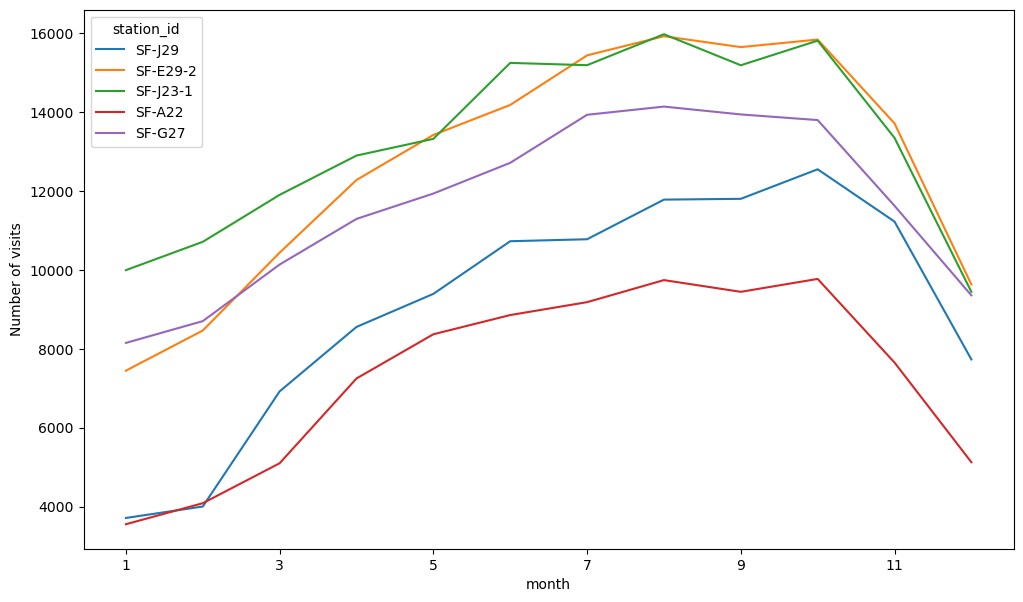

In [35]:
monthly.loc[top_variation.index, list(range(1,13))].T.plot(figsize=(12, 7), ylabel='Number of visits', stacked=False)

Now we try finding the highest jump between month to month of our top 5 stations with the highest range.

In [ ]:
import calendar

for i in range(len(top_variation.index)):
    curr_item = monthly.loc[top_variation.index[i]]
    max_diff = 0
    month_start = 0
    month_end = 1
    for j in range(len(curr_item)-2):
        diff = abs(curr_item.iloc[j] - curr_item.iloc[j+1])
        if (diff > max_diff):
            max_diff = diff
            month_start = j
            month_end = j+1
    print(f"Maximum variation for {curr_item.name} is {max_diff}, between {calendar.month_abbr[month_start]} and {calendar.month_abbr[month_end]}")

Maximum variation for SF-J29 is 3496, between Oct and Nov
Maximum variation for SF-E29-2 is 4086, between Oct and Nov
Maximum variation for SF-J23-1 is 3905, between Oct and Nov
Maximum variation for SF-A22 is 2528, between Oct and Nov
Maximum variation for SF-G27 is 2271, between Oct and Nov
